In [8]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [170]:
import pyodbc as py
import pandas as pd
from pandas import DataFrame
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
import numpy
from math import sqrt

**Displaying the drivers present**

In [171]:
py.drivers()

['SQL Server',
 'ODBC Driver 17 for SQL Server',
 'SQL Server Native Client 11.0',
 'SQL Server Native Client RDA 11.0']

**Making Connection with sql server**

In [172]:
conn=py.connect('Driver={ODBC Driver 17 for SQL Server};'
               'Server=localhost\SQLEXPRESS;'
               'Database=DataWareHouseProject;'
               'Trusted_Connection=yes;')
cursor=conn.cursor()

**Sql query**

In [189]:
sql="select RequestDate,count(LocumRequestID) as RequestCount from DW_LOCUMREQUEST group by RequestDate"

**Storing the resultant table from the query into a dataframe**

In [190]:
df=pd.read_sql(sql,conn)

df.shape

(26, 2)

**Displaying the dataframe**

In [191]:
print(df)

   RequestDate  RequestCount
0   2002-01-23             3
1   2002-01-24             4
2   2002-01-25             2
3   2002-01-28             1
4   2002-01-30             5
5   2002-02-04             5
6   2002-02-05            11
7   2002-02-06             6
8   2002-02-07             4
9   2002-02-08             1
10  2002-02-11             1
11  2002-02-12             2
12  2002-02-13             1
13  2002-02-14             1
14  2002-02-15             7
15  2002-02-18             2
16  2002-02-19            15
17  2002-02-20             2
18  2002-02-25             2
19  2002-02-26             1
20  2002-04-09             1
21  2002-08-28             1
22  2002-10-30             2
23  2002-10-31             4
24  2004-02-04             2
25  2004-06-16             1


**Plot Data**

<AxesSubplot:>

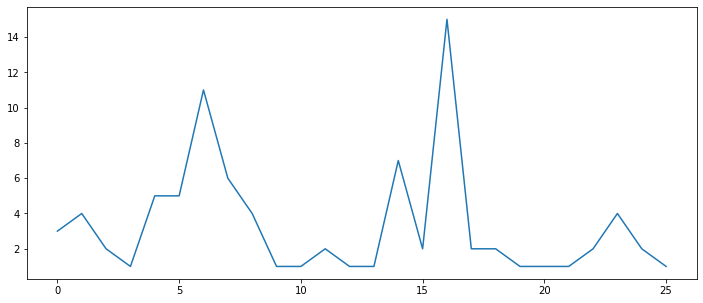

In [192]:
df['RequestCount'].plot(figsize=(12,5))


**Check for Stationarity**

In [193]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  df1 = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",df1[0])
  print("2. P-Value : ", df1[1])
  print("3. Num Of Lags : ", df1[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", df1[3])
  print("5. Critical Values :")
  for key, val in df1[4].items():
      print("\t",key, ": ", val)

In [194]:
adf_test(df['RequestCount'])

1. ADF :  -2.4009626531559967
2. P-Value :  0.14146489127361234
3. Num Of Lags :  9
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 16
5. Critical Values :
	 1% :  -3.9240193847656246
	 5% :  -3.0684982031250003
	 10% :  -2.67389265625


## Arima Model

In [195]:
from pmdarima import auto_arima

In [196]:
stepwise_fit = auto_arima(df['RequestCount'], 
                          suppress_warnings=True)           

stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   26
Model:                        SARIMAX   Log Likelihood                 -67.969
Date:                Mon, 23 May 2022   AIC                            139.937
Time:                        21:44:26   BIC                            142.453
Sample:                             0   HQIC                           140.662
                                 - 26                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.3462      1.206      2.774      0.006       0.982       5.710
sigma2        10.9186      3.194      3.419      0.001       4.659      17.178
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):                38.61
Prob(Q):                              0.61   Prob(JB):                         0.00
Heteroskedasticity (H):               0.37   Skew:                             2.11
Prob(H) (two-sided):                  0.16   Kurtosis:                         7.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [197]:
from statsmodels.tsa.arima_model import ARIMA

**DataSet Split**

In [198]:
print(df.shape)
train=df.iloc[:-5]
test=df.iloc[-5:]
print(train.shape,test.shape)
print(test.iloc[0],test.iloc[-1])


(26, 2)
(21, 2) (5, 2)
RequestDate     2002-08-28 00:00:00
RequestCount                      1
Name: 21, dtype: object RequestDate     2004-06-16 00:00:00
RequestCount                      1
Name: 25, dtype: object


**Train Model**

In [199]:

from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train['RequestCount'],order=(1,1,0))
model=model.fit()
model.summary()

C:\Users\DELFY DAVIS\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.RequestCount   No. Observations:                   20
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 -56.783
Method:                       css-mle   S.D. of innovations              4.102
Date:                Mon, 23 May 2022   AIC                            119.565
Time:                        21:44:28   BIC                            122.552
Sample:                             1   HQIC                           120.148
                                                                              
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1219      0.605     -0.202      0.840      -1.307       1.063
ar.L1.D.RequestCount    -0.5444      0.177     -3.083      0.002      -0.890      -0.198
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.8369           +0.0000j            1.8369            0.5000
-----------------------------------------------------------------------------
"""

<AxesSubplot:>

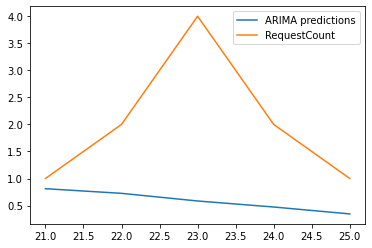

In [200]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
pred.plot(legend=True)
test['RequestCount'].plot(legend=True)


<AxesSubplot:>

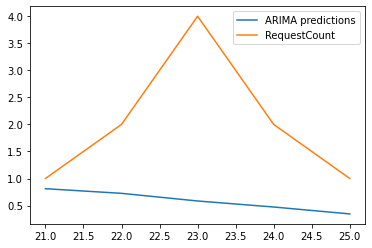

In [201]:
pred.plot(legend='ARIMA Predictions')
test['RequestCount'].plot(legend=True)

In [202]:
test['RequestCount'].mean()


2.0

**RMS**

In [203]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['RequestCount']))
print(rmse)

1.793631565682063


**PREDICTION**

In [204]:
model2=ARIMA(test['RequestCount'],order=(1,1,0))
model2=model2.fit()
df.tail()

C:\Users\DELFY DAVIS\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


,RequestDate,RequestCount
21,2002-08-28,1
22,2002-10-30,2
23,2002-10-31,4
24,2004-02-04,2
25,2004-06-16,1
